In [24]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import os
from scipy.stats import spearmanr,pearsonr
import sys
from math import log10
from matplotlib import cm

In [77]:
def pearsonr_ci(x,y,alpha=0.05):
    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

In [12]:
NPX_data =  pd.read_csv('4manuscript/cleaned_NPX_data.csv')
NPX_data = NPX_data.dropna(axis=1)

In [13]:
patient_data =  pd.read_csv('4manuscript/cleaned_patient_data.csv')

In [14]:
depressed_patients = patient_data[patient_data['sis3'] < 63]
depressed_ids = patient_data[patient_data['sis3'] < 63]['pid']

In [15]:
healthy_patients = patient_data[patient_data['sis3'] > 62]
healthy_ids = patient_data[patient_data['sis3'] > 62]['pid']

In [16]:
healthy_NPX = NPX_data[NPX_data['pid'].isin(healthy_ids)]
depressed_NPX = NPX_data[NPX_data['pid'].isin(depressed_ids)]

# First Plot Without Any Transformation

In [22]:
protein_names = pd.read_excel(open(os.path.join('4manuscript/20191510_Buckwalter_NPX.xlsx'),'rb'), sheet_name='NPX_Data', usecols = 'A:AUA', skiprows=1, nrows=5).transpose()
new_header = protein_names.iloc[0] #grab the first row for the header
protein_names = protein_names[1:] #take the data less the header row
protein_names.columns = new_header
protein_names = protein_names.dropna(subset = ['Assay','OlinkID'], axis=0)
pr_dic = dict(zip(protein_names.Assay,protein_names.OlinkID)) 

In [23]:
from scipy import stats
x = []
y = []
n = 0
y = 0
prs_to_plot = ['HPGDS']#['IL1B']#['IL6'] #['TNF']#  ['EGF']#['TRIM5']##
for k in prs_to_plot:#,,:#pr_dic.keys(): 'TRIM5'
    c = pr_dic[k]

# Second Inverse Log Transformation

In [25]:
inv_NPX_data = NPX_data.copy()
for c in inv_NPX_data:
    if c not in ['pid']:
        inv_NPX_data[c] = inv_NPX_data[c].apply(lambda x: pow(2,x))

In [26]:
healthy_inv_NPX = inv_NPX_data[inv_NPX_data['pid'].isin(healthy_ids)]

In [27]:
depressed_inv_NPX =  inv_NPX_data[inv_NPX_data['pid'].isin(depressed_ids)]

# Third Mean Tranformation

In [28]:
depressed_mean_NPX = depressed_inv_NPX.copy()
for c in depressed_mean_NPX:
    depressed_mean_NPX[c] =  (depressed_mean_NPX[c] / healthy_inv_NPX[c].mean())

In [29]:
healthy_mean_NPX = healthy_inv_NPX.copy()
for c in healthy_mean_NPX:
    healthy_mean_NPX[c] =  (healthy_mean_NPX[c]) / (healthy_inv_NPX[c].mean())

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


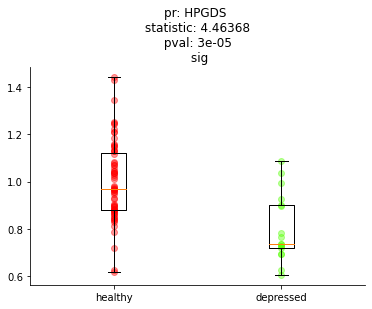

In [30]:
from scipy import stats
x = []
y = []
n = 0
y = 0
for k in prs_to_plot:#,'EGF','HPGDS']:#pr_dic.keys():
    c = pr_dic[k]
    ax = plt.subplot(111)
    if not c in healthy_NPX.columns:
        print(k)
        n = n +1
        continue
    y = y +1
    l1 = healthy_mean_NPX[c].values.tolist()
    l2 = depressed_mean_NPX[c].values.tolist()
    vals=[l1,l2]
    x1 = [1 for i in l1]
    x2 = [2 for i in l2]
    xs = [x1,x2]
    names = ['healthy', 'depressed']
    #plt.savefig('test.pdf')
    ax.boxplot(vals, labels=names, showfliers=False)
    ngroup = len(vals)
    clevels = np.linspace(0., 1., ngroup)

    for x, val, clevel in zip(xs, vals, clevels):
        ax.scatter(x, val, c=cm.prism(clevel), alpha=0.4)
    #print(names), print(vals), print(xs)
    statistic, pval = stats.ttest_ind(l1,l2)
    #r, p, lo, hi = pearsonr_ci(l1,l2) #stats.ttest_ind(l1,l2)
    if pval < 0.05:
        sig = 'sig'
    else:
        sig = 'NOT sig'
    plt.title('pr: %s \n statistic: %s \n pval: %s \n %s' %(k, round(statistic,5), round(pval,5), sig))
    k_s = str(k).replace("/", " ")
    #plt.ylim(ymax = 3, ymin = 0)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #plt.savefig('healthy_dep_test/'+  k_s +'_0.pdf', bbox_inches="tight")
    #plt.close()
plt.show()